In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ioutls as io

In [2]:
dstrarr = ["0", "002", "004", "006", "008", "01"]
dlabarr = ["D=0", "D=0.02", "D=0.04", "D=0.06", "D=0.08", "D=0.1"]
nstrarr = ["4", "6"]

ndvals = len(dstrarr)
nnvals = len(nstrarr)

shapearr = ["-x", "-d"]
colarr = ["r","b","g","y","c","m"]

fileroot = "betaEnrgEdhr"
fileext  = ".txt"

dataArr = []

for nstr in nstrarr:
    for dstr in dstrarr:
        
        filename = fileroot + nstr + "-" + dstr + fileext
        
        header, data = io.readFile(filename)
        tpdata = io.typeSetData(data, [float,float])
        dataArr.append(tpdata)

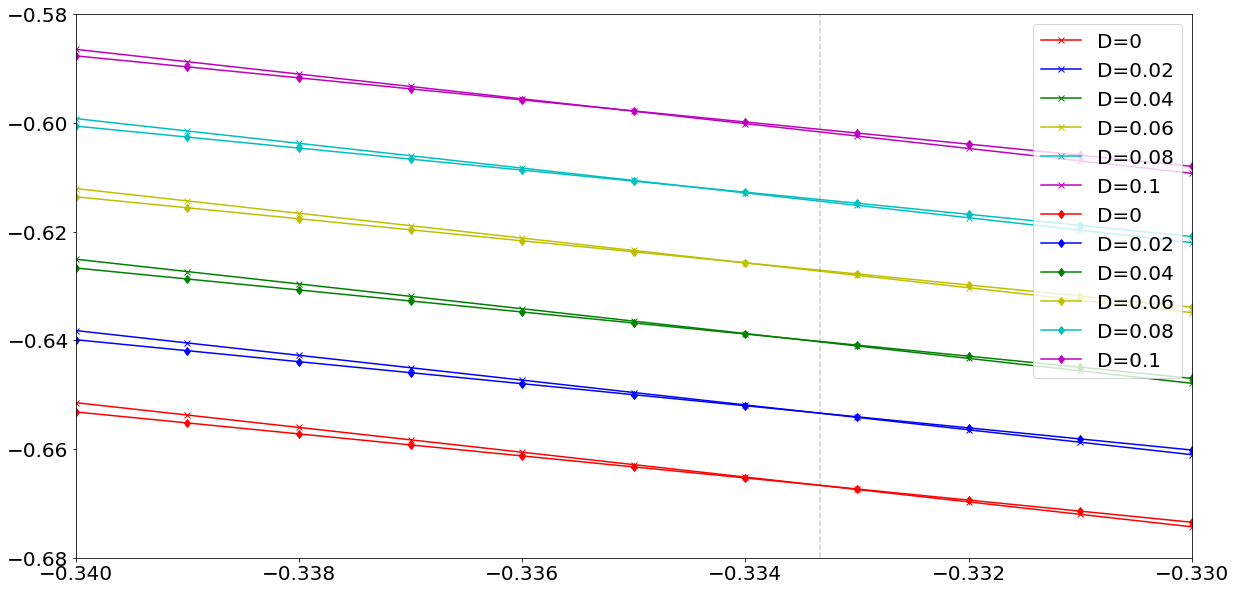

In [3]:
ls = 20
plt.rc('xtick', labelsize=ls)
plt.rc('ytick', labelsize=ls)

# Plot energy as function of system size for three d values
plt.figure(figsize=(20,10))

for n in range(0,nnvals):
    for d in range(ndvals):
            #linestyle = colarr[d]+shapearr[n] 
            color = colarr[d] + shapearr[n]
            #shape = shapearr[n]
            plt.plot(dataArr[n*ndvals + d][:,0], dataArr[n*ndvals+d][:,1], color, label=dlabarr[d])
        
plt.xlim(-0.34,-0.33)
plt.ylim(-0.68,-0.58)
plt.axvline(-1.0/3.0, linestyle="--", color="k", alpha=0.2)
plt.legend(fontsize=20)
plt.savefig("EnergyVBetaN2N4DRang.pdf")

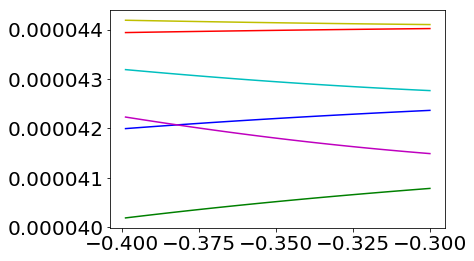

In [15]:

betaArr = dataArr[0][:,0]

for d in range(ndvals):
    aveEnrg = np.zeros(len(dataArr[0])) # average  energy per site over system size
    sqaveEnrg = np.zeros(len(dataArr[0])) # average energy per site squared

    for i in range(0,nnvals):
        aveEnrg += np.array(dataArr[d*nnvals+i][:,1])
        sqaveEnrg += np.array(dataArr[d*nnvals+i][:,1])**2
    
    aveEnrg = aveEnrg / (nnvals)
    sqaveEnrg = sqaveEnrg / (nnvals)

    varEnrg = sqaveEnrg - (aveEnrg**2)

    plt.plot(betaArr, varEnrg, color=colarr[d])

#plt.ylim(0,0.001)
#plt.xlim(-0.34,-0.33)

# 